# Tiền Xử Lý Dữ Liệu

import các thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Xem qua dữ liệu ban đầu

In [2]:
# đọc dữ liệu
df = pd.read_csv("../data/raw/train.csv")


# Hiển thị thông tin cơ bản về dataset
print("THÔNG TIN CƠ BẢN VỀ DATASET")
print("-" * 40)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng mẫu (samples): {df.shape[0]}")
print(f"Số đặc trưng (features): {df.shape[1]}")

THÔNG TIN CƠ BẢN VỀ DATASET
----------------------------------------
Kích thước dataset: (800, 22)
Số lượng mẫu (samples): 800
Số đặc trưng (features): 22


In [3]:
# Phân tích cấu trúc và kiểu dữ liệu
print("PHÂN TÍCH CẤU TRÚC DỮ LIỆU")
print("-" * 40)

# Thông tin tổng quan về dataset
print("Thông tin dataset:")
print(df.info())


PHÂN TÍCH CẤU TRÚC DỮ LIỆU
----------------------------------------
Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 

In [4]:
# hiển thị tất cả các cột của một khung dữ liệu
pd.set_option('display.max_columns', None)

# Xem 5 dòng đầu tiên
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,adult,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,adult,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,child,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,young adult,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,adult,Self,0


In [5]:
# Xem 5 dòng cuối cùng
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,teen,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,young adult,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,child,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,teen,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,adult,Self,0


In [6]:
# Kiểm tra các giá trị duy nhất trong mỗi cột trừ các cột số(ID, age, result)
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [7]:
# Kiểm tra missing values
print("PHÂN TÍCH MISSING VALUES:")
print("-" * 30)
missing_data = df.isnull().sum()
print(missing_data)

PHÂN TÍCH MISSING VALUES:
------------------------------
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


Nhận xét: 


Thông tin tổng quan

Tổng số mẫu: 800 dòng (quan sát)

Tổng số cột: 22 biến (thuộc tính)

Không có giá trị null → dữ liệu đầy đủ nhưng các cột ethnicity, contry_of_res, relation đang còn có dữ liệu dạng '?' chưa đúng định dạng nên được xử lý

Loại bỏ cột id vì chỉ để định danh thứ tự không ảnh hưởng tới mô hình, đưa cột age về dạng int

In [8]:
# chuyển đổi cột "age" từ kiểu dữ liệu float sang int
df["age"] = df["age"].astype(int)

# bỏ cột id
df = df.drop('ID', axis=1)
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,adult,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,adult,Self,0


Các cột ethnicity và relation đang còn có các row bị khuyết('?') và sẽ thay thế '?' bằng 'Others'


Cột ethnicity và contry_of_res có những giá trị sai định dạng hoặc các giá trị tương tự hoặc đồng nghĩa (ví dụ: "Hong Kong" → "China", "AmericanSamoa" → “United States”, "others" -> "Others", ...).

In [9]:
# Thay thế các giá trị sai định dạng hoặc đồng nghĩa trong các cột
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})
df["relation"] = df["relation"].replace({"?": "Others"})

mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

print(df["contry_of_res"].unique())
print(df["ethnicity"].unique())
print(df["relation"].unique())

['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Vietnam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy' 'Bahamas'
 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka' 'Russia' 'Bolivia'
 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden' 'Iceland' 'China'
 'Angola' 'Germany' 'Spain' 'Tonga' 'Pakistan' 'Iran' 'Argentina' 'Japan'
 'Mexico' 'Nicaragua' 'Sierra Leone' 'Czech Republic' 'Niger' 'Romania'
 'Cyprus' 'Belgium' 'Burundi' 'Bangladesh']
['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
['Self' 'Relative' 'Parent' 'Others' 'Health care professional']


In [10]:
# Thống kê mô tả cho các biến số
numeric_columns = ['age', 'result']
print("Thống kê biến số:")
numeric_stats = df[numeric_columns].describe()
print(numeric_stats)

Thống kê biến số:
              age      result
count  800.000000  800.000000
mean    27.963750    8.537303
std     16.329827    4.807676
min      2.000000   -6.137748
25%     17.000000    5.306575
50%     24.000000    9.605299
75%     35.250000   12.514484
max     89.000000   15.853126


Trực quan hóa cho các cột age và result

Mean: 27.96375
Median: 24.0


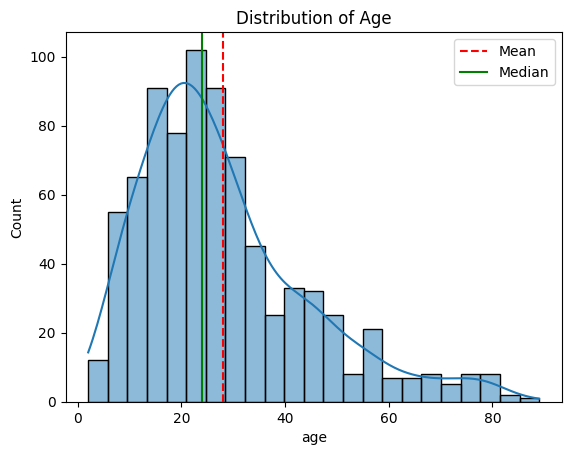

In [11]:
# Biểu đồ phân phối cho age

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# tính mean và median của age
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# vẽ mean và median trên biểu đồ
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


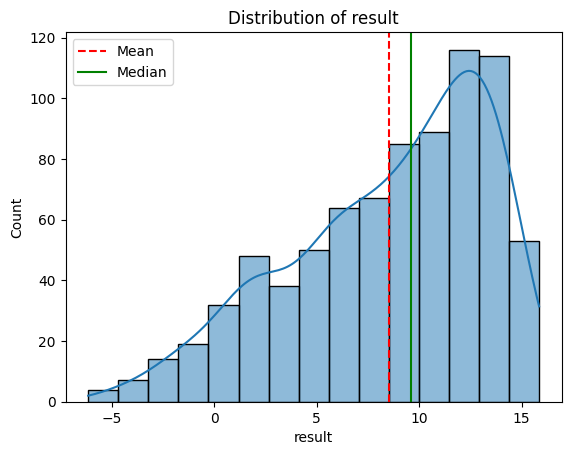

In [12]:
# Biểu đồ phân phối cho "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# tính mean và median của result
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# vẽ mean và median trên biểu đồ
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Nhận xét: 

Distribution of Age: Dữ liệu tuổi có dạng lệch phải phần đuôi kéo dài về phía bên phải (các giá trị tuổi cao). Phần lớn người trong dữ liệu nằm trong độ tuổi 15–30. Có một số ít cá thể lớn tuổi (40–80) khiến đuôi phải kéo dài.


Distribution of Result: Ngược lại, phân bố của result có dạng lệch trái đuôi kéo dài về phía bên trái (các giá trị nhỏ hơn). Phần lớn các giá trị result tập trung trong khoảng 8–15. Có một số ít giá trị nhỏ (từ −5 đến 0) gây ra độ lệch trái.

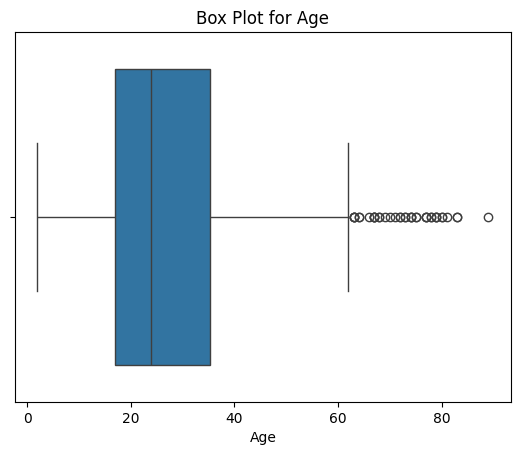

In [13]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

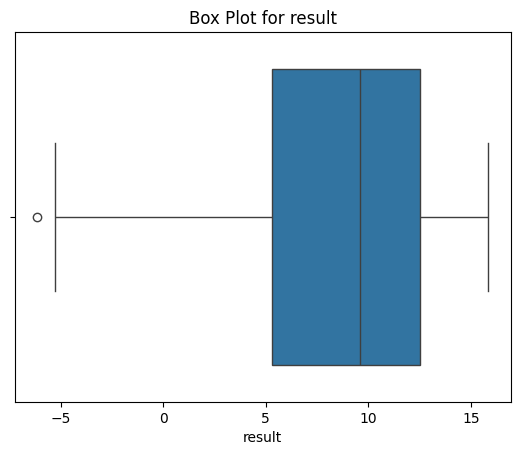

In [14]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

Nhận thấy ở 2 cột này có các giá trị ngoại lai tương đối ít nên không cần phải tiền xử lý

Phân tích biến mục tiêu

PHÂN TÍCH BIẾN MỤC TIÊU (Class/ASD)
----------------------------------------
Phân phối lớp:
   - Lớp 0 (Không ASD): 639 mẫu (79.9%)
   - Lớp 1 (Có ASD): 161 mẫu (20.1%)


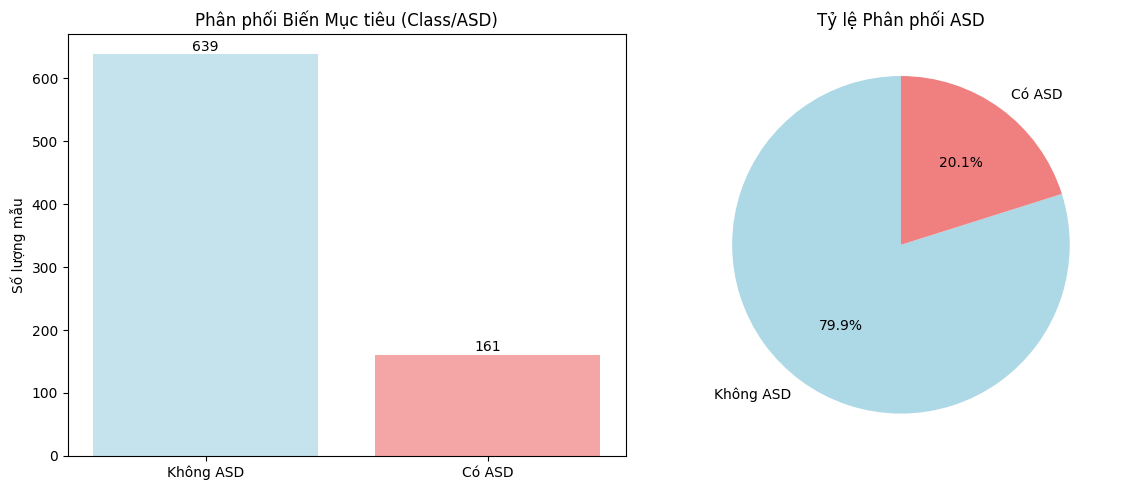

In [15]:
#Phân tích biến mục tiêu Class/ASD
print("PHÂN TÍCH BIẾN MỤC TIÊU (Class/ASD)")
print("-" * 40)

# Thống kê phân phối
asd_distribution = df['Class/ASD'].value_counts()
asd_percentage = df['Class/ASD'].value_counts(normalize=True) * 100

print(f"Phân phối lớp:")
print(f"   - Lớp 0 (Không ASD): {asd_distribution[0]} mẫu ({asd_percentage[0]:.1f}%)")
print(f"   - Lớp 1 (Có ASD): {asd_distribution[1]} mẫu ({asd_percentage[1]:.1f}%)")

# Visualization phân phối biến mục tiêu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ cột
axes[0].bar(['Không ASD', 'Có ASD'], asd_distribution.values, 
           color=['lightblue', 'lightcoral'], alpha=0.7)
axes[0].set_title('Phân phối Biến Mục tiêu (Class/ASD)')
axes[0].set_ylabel('Số lượng mẫu')
for i, v in enumerate(asd_distribution.values):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom')

# Biểu đồ tròn
colors = ['lightblue', 'lightcoral']
axes[1].pie(asd_distribution.values, labels=['Không ASD', 'Có ASD'], 
           autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Tỷ lệ Phân phối ASD')

plt.tight_layout()
plt.show()

Nhận xét: Phân bố không cân bằng số lượng mẫu “Không ASD” (không mắc rối loạn phổ tự kỷ) chiếm ưu thế rõ rệt so với nhóm “Có ASD” (có rối loạn phổ tự kỷ). Điều này có thể ảnh hưởng đến hiệu quả mô hình học máy: các mô hình có xu hướng dự đoán nghiêng về nhóm chiếm đa số. Cần xem xét kỹ chiến lược xử lý mất cân bằng khi huấn luyện mô hình Tăng cường dữ liệu thiểu số (oversampling) ví dụ: SMOTE

Chuyển đổi dữ liệu và chuẩn hóa các giá trị

- Từ các bảng trên ta có thể chia data thành các nhóm Features:

    - Numerical Features: age, result -> Sử dụng StandardScaler

    - Binary Features: A1_Score → A10_Score -> gữi nguyên vì đã dạng 0/1

    - Categorical Features: 
        - Ordinal Categorical: age_desc -> Sử dụng OrdinalEncoder
        - Nominal Categorical: gender, jaundice, austim, used_app_before -> Sử dụng OrdinalEncoder vì các cột này cũng chỉ có 2 giá trị nên không bị ảnh hưởng
                               Còn ethnicity, contry_of_res, relation -> Sử dụng TargetEncoder

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


def build_preprocessor(df_train, y):
    """
    Xây dựng và fit preprocessor chỉ trên tập train.
    """
    # ==== Nhóm cột theo loại xử lý ====
    num_features = ["age", "result"]
    binary_features = [f"A{i}_Score" for i in range(1, 11)]

    label_features = ["gender", "jaundice", "austim", "used_app_before", "age_desc"]
    target_features = ["ethnicity", "contry_of_res", "relation"]

    #Thứ tự của age_desc tăng dần
    age_desc_values = ['child', 'teen', 'young adult', 'adult', 'elderly']

    label_categories = [df_train[v].unique() for v in label_features[:4]]
    label_categories.append(age_desc_values)
    # ==== Pipeline con ====
    num_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    label_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder(categories=label_categories))
    ])

    target_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder())
    ])

    # ==== ColumnTransformer ====
    preprocessor = ColumnTransformer([
        ("num", num_transformer, num_features),
        ("label", label_transformer, label_features),
        ("target", target_transformer, target_features),
        ("binary", "passthrough", binary_features)
    ])

    # Fit preprocessor chỉ trên train
    preprocessor.fit(df_train, y)

    return preprocessor

Hàm build_preprocessor(df_train, y) tạo và huấn luyện bộ tiền xử lý dữ liệu gồm nhiều pipeline con cho từng loại biến. Các bước bao gồm: điền giá trị thiếu, chuẩn hóa, mã hóa biến phân loại (Ordinal & Target Encoding) và giữ nguyên biến nhị phân. Bộ preprocessor này được fit trên tập huấn luyện để đảm bảo tính khách quan và có thể áp dụng thống nhất cho cả tập huấn luyện và kiểm tra.

In [31]:
target = df['Class/ASD']
X = df.drop('Class/ASD', axis=1)

#fit transform trên toàn bộ dữ liệu để phân tích và trực quan hóa ma trận tương quan và phục vụ cho giảm chiều dữ liệu
preprocessor = build_preprocessor(X, target)
X_processed = preprocessor.transform(X)

#Chuyển vè DataFrame
num_features = ["age", "result"]
label_features = ["gender", "jaundice", "austim", "used_app_before", "age_desc"]
target_features = ["ethnicity", "country_of_res", "relation"]
binary_features = [f"A{i}_Score" for i in range(1, 11)]

all_features = num_features + label_features + target_features + binary_features
df_processed = pd.DataFrame(X_processed, columns=all_features)
df_processed['Class/ASD'] = target

df_processed.head()

,age,result,gender,jaundice,austim,used_app_before,age_desc,ethnicity,country_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,0.614981,-0.455003,0.0,0.0,0.0,0.0,3.0,0.038457,0.058150,0.207326,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
1,1.166464,-1.307503,1.0,0.0,0.0,0.0,3.0,0.038457,0.028047,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.284574,1.314176,1.0,0.0,1.0,0.0,0.0,0.469201,0.496671,0.207326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,-0.304158,-1.303042,0.0,0.0,0.0,0.0,2.0,0.038457,0.496671,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.921360,-2.771177,1.0,0.0,0.0,0.0,3.0,0.038457,0.000000,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Ma trận tương quan giữa các features, target

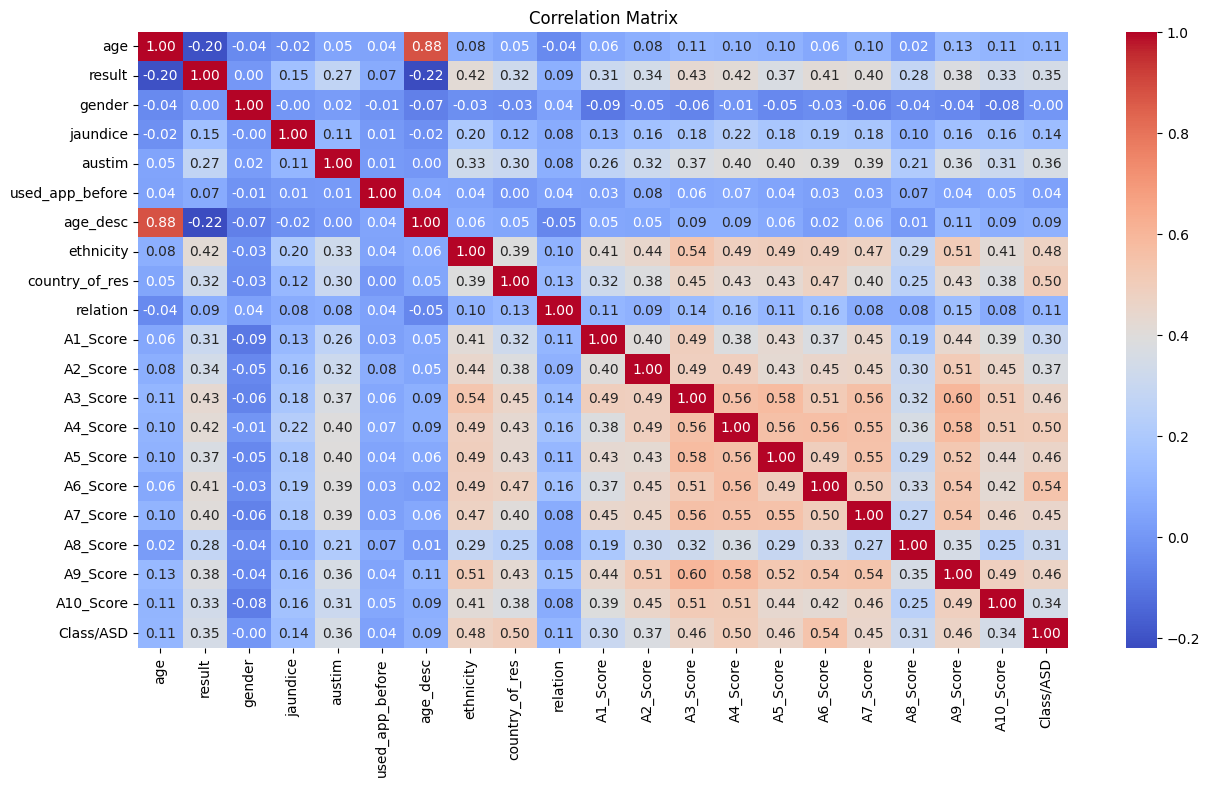

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Loại bỏ cột age_desc vì đa cộng tuyến mạnh với cột age làm ảnh hưởng đến việc dự đoán của mô hình

In [33]:
df_processed = df_processed.drop('age_desc', axis=1)

df_processed.head()

,age,result,gender,jaundice,austim,used_app_before,ethnicity,country_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,0.614981,-0.455003,0.0,0.0,0.0,0.0,0.038457,0.058150,0.207326,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
1,1.166464,-1.307503,1.0,0.0,0.0,0.0,0.038457,0.028047,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.284574,1.314176,1.0,0.0,1.0,0.0,0.469201,0.496671,0.207326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,-0.304158,-1.303042,0.0,0.0,0.0,0.0,0.038457,0.496671,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.921360,-2.771177,1.0,0.0,0.0,0.0,0.038457,0.000000,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [34]:
# Thống kê lại sau khi các dữ liệu đã được tiền xử lý
df_processed.describe()

,age,result,gender,jaundice,austim,used_app_before,ethnicity,country_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
count,8.000000e+02,8.000000e+02,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-7.105427e-17,3.436140e-16,0.662500,0.231250,0.16375,0.062500,0.200980,0.197444,0.200810,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,0.201250
std,1.000626e+00,1.000626e+00,0.473153,0.421896,0.37028,0.242213,0.189779,0.195223,0.044063,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,0.401185
min,-1.590953e+00,-3.054331e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.024418,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.718141e-01,-6.724142e-01,0.000000,0.000000,0.00000,0.000000,0.038457,0.028047,0.207326,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.428825e-01,2.222829e-01,1.000000,0.000000,0.00000,0.000000,0.062373,0.130977,0.207326,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,4.464718e-01,8.277741e-01,1.000000,0.000000,0.00000,0.000000,0.469201,0.413125,0.207326,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,3.740054e+00,1.522648e+00,1.000000,1.000000,1.00000,1.000000,0.469201,1.000000,0.369312,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Sau khi tiền xử lý, các biến liên tục đã được chuẩn hóa, tạo điều kiện thuận lợi cho phân tích PCA và các thuật toán ML. Các biến khảo sát hành vi (A1–A10) có phân phối khá đồng đều, là nguồn thông tin chính giúp nhận diện ASD. Tuy nhiên, dữ liệu lệch lớp (chỉ ~20% ASD) và lệch giới tính (66% nam), vì vậy cần chú ý xử lý mất cân bằng để tránh mô hình thiên lệch.

Chỉnh xử lại hàm build_preprocessor không xử lý cột age_desc

In [143]:
def build_preprocessor(df_train, y):
    df_train = df_train.drop(columns=['age_desc'], errors='ignore')

    num_features = ["age", "result"]
    binary_features = [f"A{i}_Score" for i in range(1, 11)]
    label_features = ["gender", "jaundice", "austim", "used_app_before"]
    target_features = ["ethnicity", "contry_of_res", "relation"]

    # Lọc cột tồn tại
    num_features = [c for c in num_features if c in df_train.columns]
    label_features = [c for c in label_features if c in df_train.columns]
    target_features = [c for c in target_features if c in df_train.columns]
    binary_features = [c for c in binary_features if c in df_train.columns]

    num_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    label_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder())
    ])

    target_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder())
    ])

    preprocessor = ColumnTransformer([
        ("num", num_transformer, num_features),
        ("label", label_transformer, label_features),
        ("target", target_transformer, target_features),
        ("binary", "passthrough", binary_features)
    ])

    preprocessor.fit(df_train, y)
    return preprocessor


# Giảm chiều dữ liệu

In [35]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PCA – Principal Component Analysis

In [36]:
y = df_processed['Class/ASD']
X = df_processed.drop('Class/ASD', axis=1)
pca = PCA()
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(800, 19)


In [22]:
# chuyển dữ liệu PCA về DataFrame để dễ dàng lấy được tham số thống kê
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.028462,0.871561,-0.376893,-0.969530,-0.579963,-0.230736,-0.611214,0.133664,0.510182,0.005234,0.585120,0.355611,-0.181551,0.059445,-0.357875,-0.000754,-0.178188,-0.188800,0.015956
1,-2.010286,1.069749,0.384418,0.327835,-0.203016,0.014309,-0.248169,-0.064393,-0.151494,0.042012,-0.013623,-0.015992,-0.025148,-0.073468,0.049335,-0.029208,-0.036807,-0.000088,0.016850
2,2.253323,-1.121780,-0.523135,0.416633,-0.027156,-0.398082,-0.328441,-0.146724,-0.084404,-0.112370,-0.308786,-0.106357,-0.285838,0.125241,0.107404,-0.059991,0.099408,0.066072,-0.009539
3,-1.925140,-0.236445,-0.288140,-0.573790,0.112360,0.156167,-0.388852,-0.261569,-0.229599,0.083534,-0.010383,-0.051541,-0.019100,-0.060434,0.101946,-0.039097,0.423566,-0.036150,0.011285
4,-2.906354,1.289863,-0.771133,0.413601,-0.187593,0.020172,-0.287769,-0.076594,-0.142701,0.053540,-0.023617,0.001107,-0.032524,-0.129156,0.076619,-0.000275,-0.052077,0.039862,0.014837


In [23]:
df_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.998401e-17,-1.332268e-17,-4.884981e-17,1.465494e-16,-4.884981e-17,-1.332268e-17,5.551115e-19,-2.498002e-17,-1.554312e-17,3.996803e-17,-7.771561e-18,-6.661338e-18,-3.552714e-17,-3.497203e-17,-1.415534e-17,-4.940492e-17,7.999157e-16,7.160939e-16,-2.816289e-15
std,1.330839e+00,1.054072e+00,6.625649e-01,4.786398e-01,4.595100e-01,4.131817e-01,3.924828e-01,3.894307e-01,3.633706e-01,3.387311e-01,3.348661e-01,3.283552e-01,3.135605e-01,3.054296e-01,2.998190e-01,2.400011e-01,1.590743e-01,1.422178e-01,4.292959e-02
min,-3.079769e+00,-2.259507e+00,-2.550887e+00,-1.048432e+00,-9.256370e-01,-7.546295e-01,-1.189367e+00,-1.238817e+00,-9.476015e-01,-1.251769e+00,-1.015391e+00,-1.038480e+00,-1.092595e+00,-1.010316e+00,-9.198709e-01,-1.738325e-01,-4.110593e-01,-4.408060e-01,-1.891864e-01
25%,-1.050254e+00,-7.441792e-01,-4.349163e-01,-4.687336e-01,-3.040296e-01,-3.230475e-01,-2.612361e-01,-2.319618e-01,-1.622435e-01,-1.671034e-01,-2.476468e-01,-1.278542e-01,-1.956727e-01,-1.657140e-01,-1.786743e-01,-8.857125e-02,-9.573449e-02,-8.432809e-02,-2.999565e-03
50%,-2.029266e-01,-1.839138e-01,6.274485e-03,1.937338e-01,-1.720726e-02,-8.138246e-02,-7.456428e-02,-2.221631e-02,-7.154152e-02,2.088995e-02,4.494706e-03,-1.777065e-02,-1.791721e-02,-9.357342e-03,3.435353e-02,-5.516389e-02,-3.534811e-02,-9.842651e-03,7.573031e-03
75%,1.248435e+00,5.043372e-01,4.425612e-01,3.757091e-01,3.492716e-01,1.726116e-01,2.335669e-01,2.434600e-01,1.387347e-01,1.328730e-01,1.533382e-01,7.748901e-02,1.962129e-01,1.450947e-01,1.160608e-01,-2.517880e-02,1.050383e-01,8.326239e-02,1.408526e-02
max,2.476987e+00,3.481089e+00,2.415801e+00,8.309514e-01,1.033290e+00,1.258310e+00,1.073187e+00,1.247250e+00,9.217211e-01,1.239697e+00,1.173659e+00,9.722931e-01,9.356059e-01,1.107911e+00,1.391199e+00,1.069766e+00,6.476953e-01,4.343060e-01,1.658078e-01


Sau khi thực hiện PCA, các thành phần chính (PC) có trung bình gần 0, chứng tỏ dữ liệu chuẩn hóa tốt. Phân tích thống kê cho thấy PC1–PC3 có độ lệch chuẩn lớn và phạm vi giá trị rộng, giữ phần lớn thông tin, trong khi các PC cuối (PC17–PC19) có độ lệch chuẩn nhỏ và phạm vi hẹp, gần như không đóng góp thêm thông tin. Như vậy, PC1–PC6 là các trục quan trọng nhất và nên được giữ lại để giảm chiều dữ liệu mà vẫn bảo toàn phần lớn thông tin, còn các PC sau có thể bỏ đi.

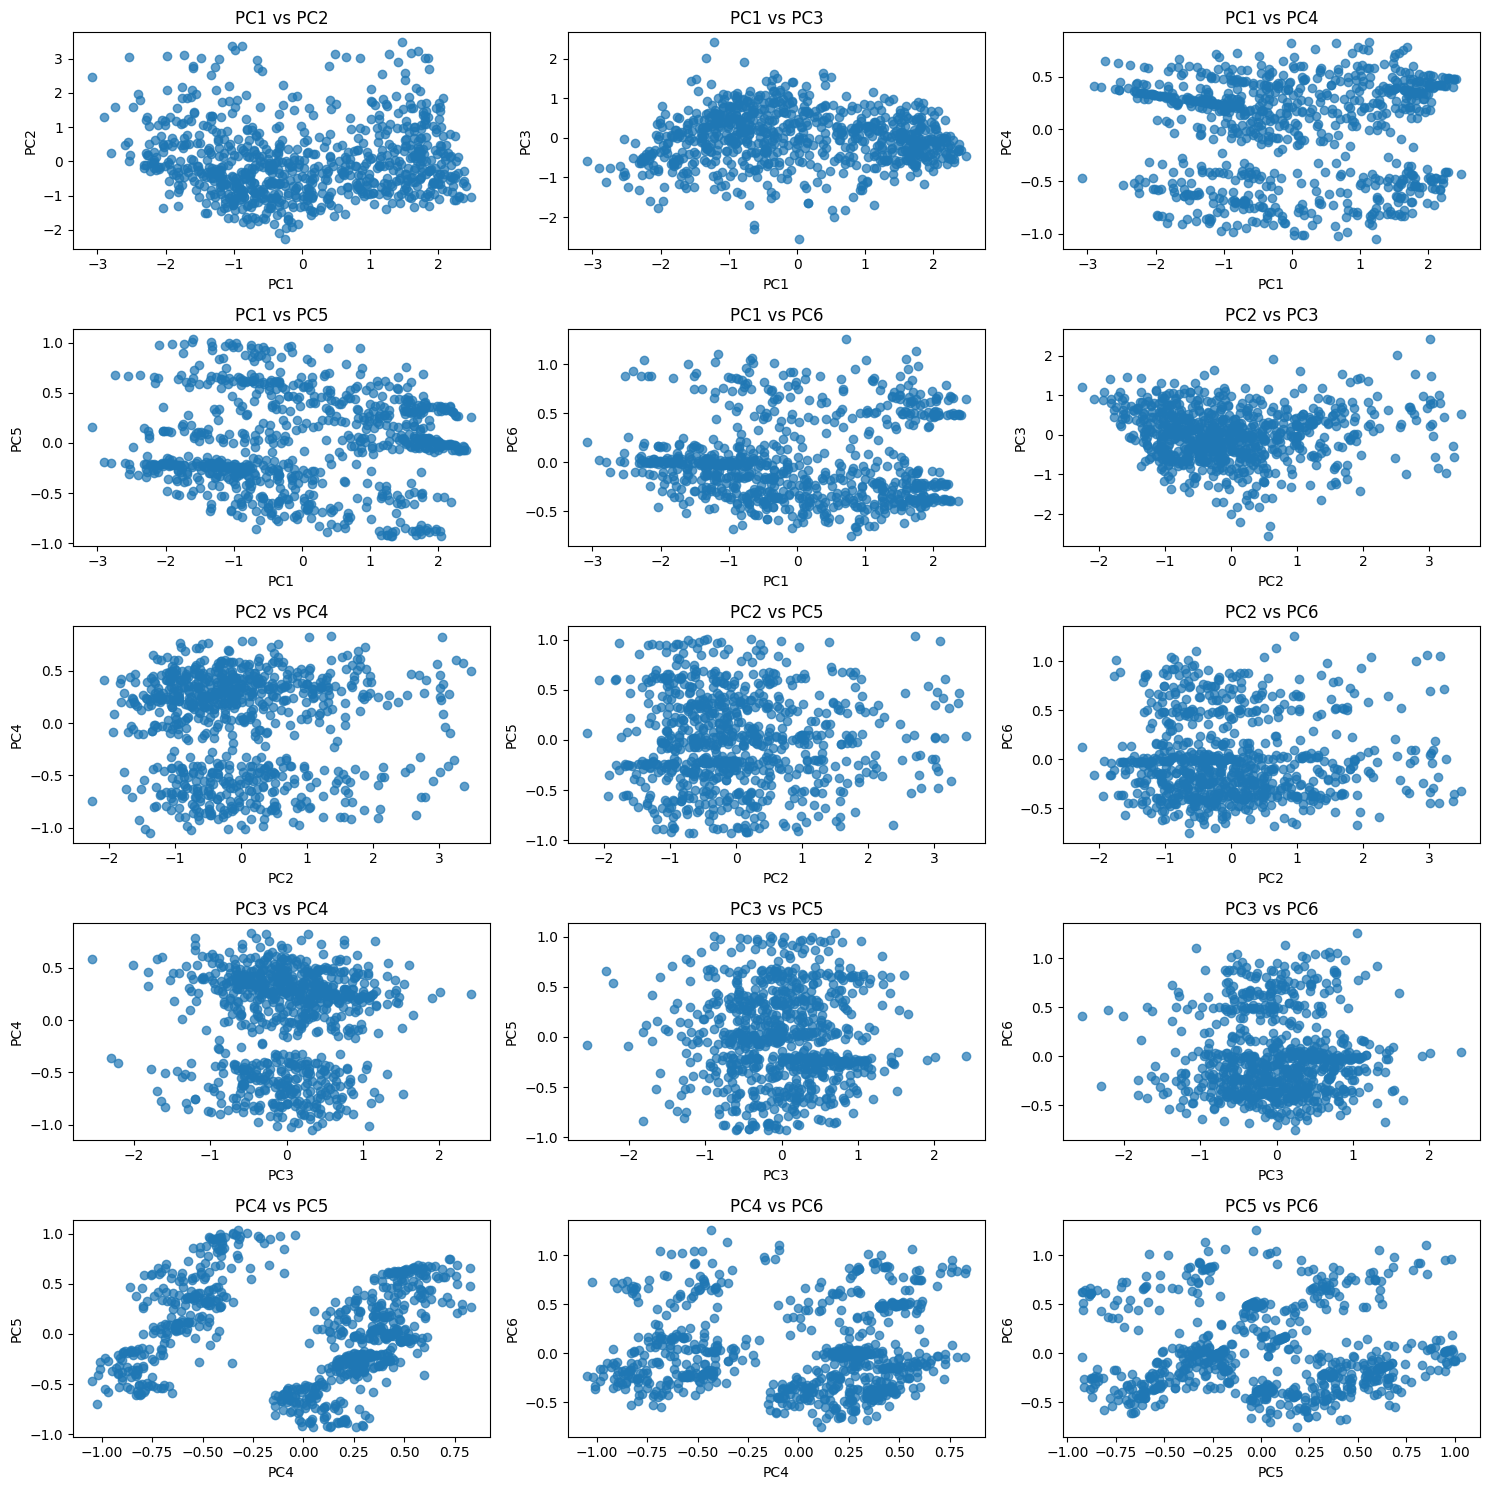

In [25]:
import itertools
# Chọn 6 PC đầu
pcs_to_plot = df_pca[['PC1','PC2','PC3','PC4','PC5','PC6']]

# Tạo tất cả các cặp PC
pc_pairs = list(itertools.combinations(pcs_to_plot.columns, 2))

# Vẽ scatter plot cho từng cặp
plt.figure(figsize=(15, 15))
for i, (pc_x, pc_y) in enumerate(pc_pairs, 1):
    plt.subplot(5, 3, i)
    plt.scatter(pcs_to_plot[pc_x], pcs_to_plot[pc_y], alpha=0.7)
    plt.xlabel(pc_x)
    plt.ylabel(pc_y)
    plt.title(f'{pc_x} vs {pc_y}')

plt.tight_layout()
plt.show()

In [26]:
explained_var_ratio = pca.explained_variance_ratio_
cum_explained = explained_var_ratio.cumsum()

pca_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_var_ratio))],
    'Explained_Variance_Ratio': explained_var_ratio,
    'Cumulative_Explained_Variance': cum_explained
})

pca_df

,PC,Explained_Variance_Ratio,Cumulative_Explained_Variance
0,PC1,0.347891,0.347891
1,PC2,0.218239,0.566130
2,PC3,0.086228,0.652358
3,PC4,0.045000,0.697358
4,PC5,0.041475,0.738832
5,PC6,0.033533,0.772365
6,PC7,0.030258,0.802623
7,PC8,0.029789,0.832412
8,PC9,0.025935,0.858347
9,PC10,0.022537,0.880884


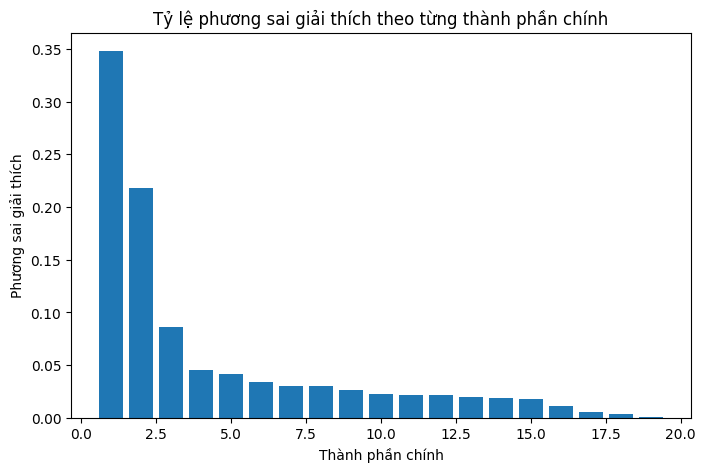

In [27]:
# Lấy explained variance ratio
exp_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio)
plt.xlabel('Thành phần chính')
plt.ylabel('Phương sai giải thích')
plt.title('Tỷ lệ phương sai giải thích theo từng thành phần chính')
plt.show()


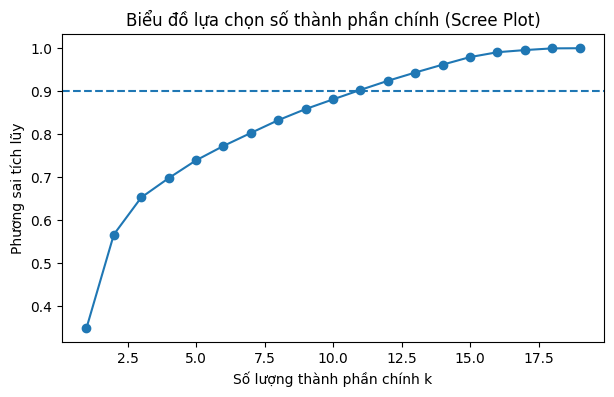

In [28]:
plt.figure(figsize=(7,4))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker='o')
plt.axhline(0.9, linestyle='--')
plt.xlabel("Số lượng thành phần chính k")
plt.ylabel("Phương sai tích lũy")
plt.title("Biểu đồ lựa chọn số thành phần chính (Scree Plot)")
plt.show()

PC1 và PC2 là hai thành phần giữ lại nhiều nhất phương sai của dữ liệu (≈ 56.6%), do đó chúng phù hợp để trực quan hóa bằng biểu đồ scatter nhằm quan sát cấu trúc phân cụm. Tuy nhiên, để giữ lại lượng thông tin cao hơn phục vụ mô hình hóa, có thể chọn từ 5 đến 10 thành phần chính, tương ứng giữ lại khoảng 74% đến 88% phương sai tổng thể. Các thành phần từ PC15 trở đi chỉ đóng góp rất nhỏ (<2%) và có thể bỏ qua.

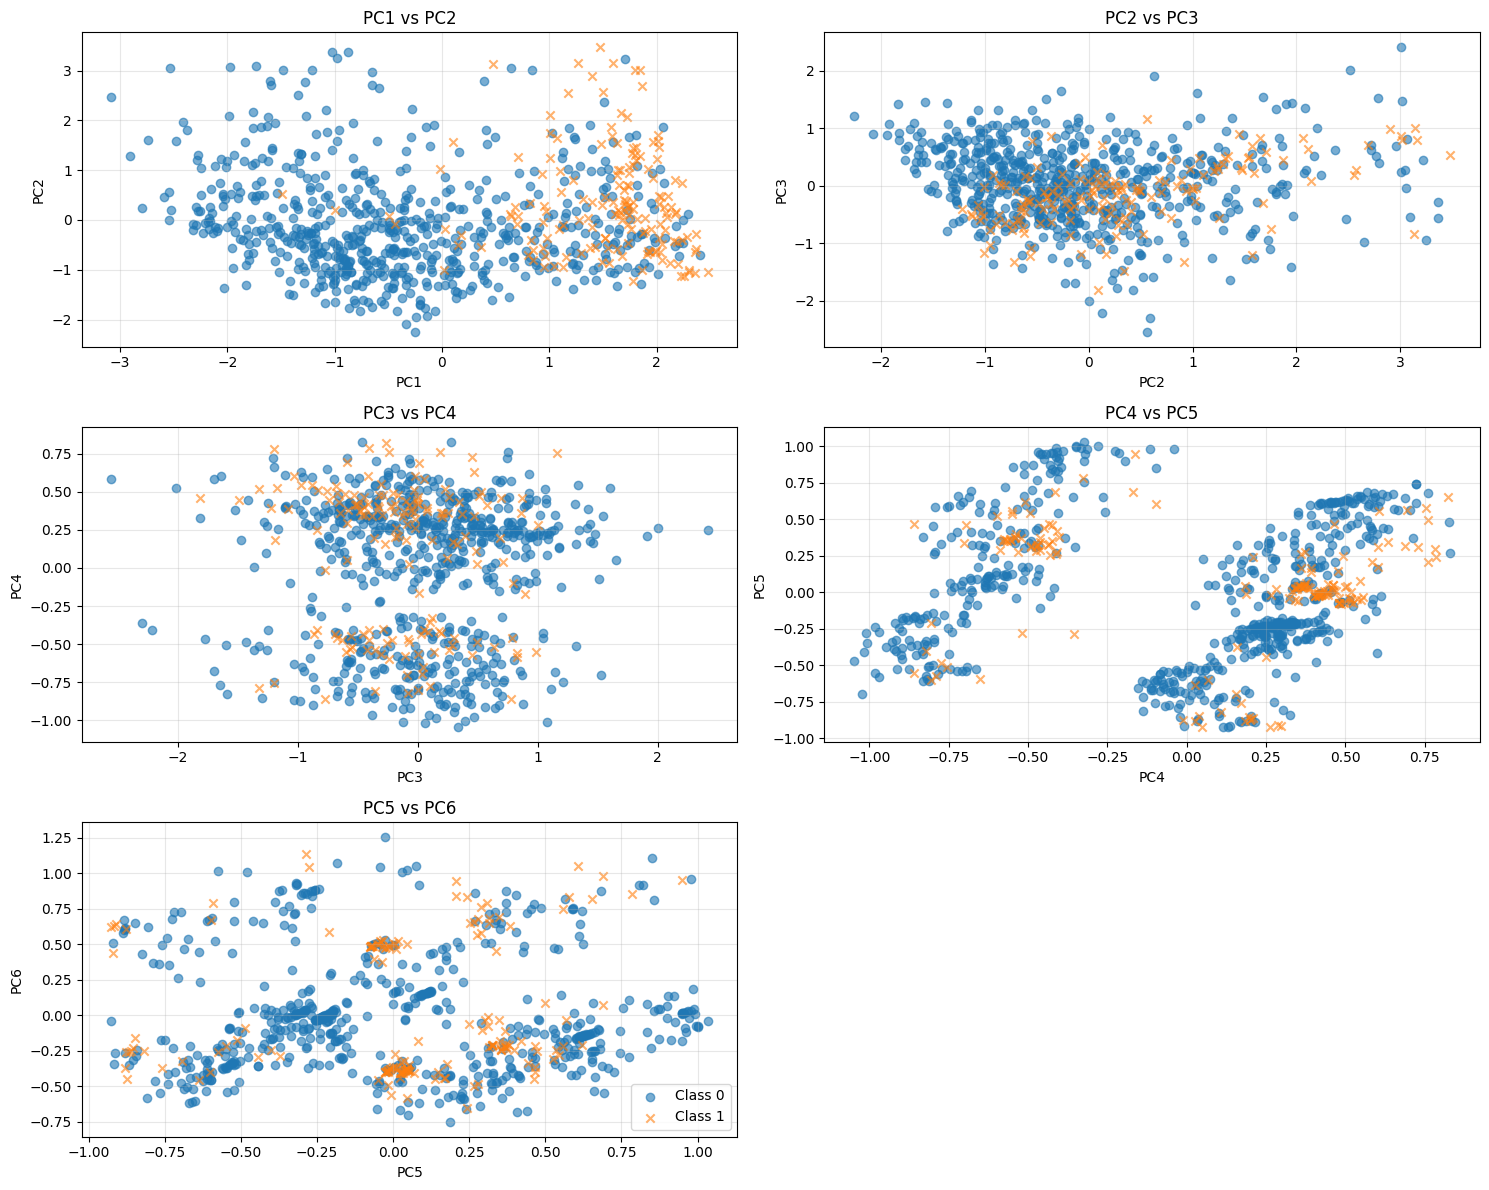

In [29]:
pairs = [(0,1), (1,2), (2,3), (3,4), (4,5)]

plt.figure(figsize=(15, 12))

for idx, (i, j) in enumerate(pairs, 1):
    PC_i = X_pca[:, i]
    PC_j = X_pca[:, j]

    plt.subplot(3, 2, idx)
    plt.scatter(PC_i[y == 0], PC_j[y == 0], alpha=0.6, label="Class 0", marker='o')
    plt.scatter(PC_i[y == 1], PC_j[y == 1], alpha=0.6, label="Class 1", marker='x')

    plt.xlabel(f"PC{i+1}")
    plt.ylabel(f"PC{j+1}")
    plt.title(f"PC{i+1} vs PC{j+1}")
    plt.grid(alpha=0.3)

# Chỉ hiển thị legend một lần ở cuối
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



### LDA – Linear Discriminant Analysis

In [30]:
# Vì LDA chỉ có thể tạo ra tối đa (số lớp - 1) thành phần, với 2 lớp (ASD và không ASD), ta chỉ có thể có 1 thành phần LDA.
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

X_lda.shape

(800, 1)

In [31]:
print("Kỳ vọng của thành phần LDA:", X_lda.mean())
print("Độ lệch chuẩn của thành phần LDA:", X_lda.std())

print("Phương sai giải thích (explained variance):", lda.explained_variance_ratio_)

Kỳ vọng của thành phần LDA: 1.3389289676979388e-15
Độ lệch chuẩn của thành phần LDA: 1.3408140751371367
Phương sai giải thích (explained variance): [1.]


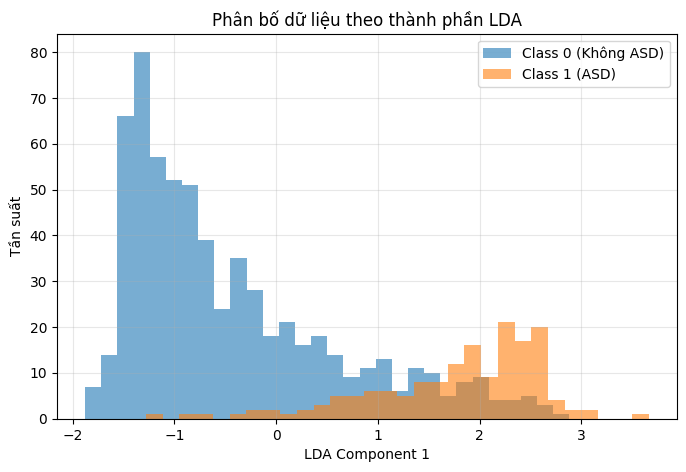

In [32]:
plt.figure(figsize=(8,5))
plt.hist(X_lda[y==0], bins=30, alpha=0.6, label="Class 0 (Không ASD)")
plt.hist(X_lda[y==1], bins=30, alpha=0.6, label="Class 1 (ASD)")
plt.xlabel("LDA Component 1")
plt.ylabel("Tần suất")
plt.title("Phân bố dữ liệu theo thành phần LDA")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Vì số lớp (Class/ASD) = 2 lớp => LDA chỉ tạo được tối đa 1 thành phần phân biệt (discriminant component)

Với phân lớp nhị phân, LDA chỉ cho ra 1 chiều, không thể 2D. Nên dùng PCA trên phần dư phương sai để thêm 1 trục phụ → tổng thành 2D

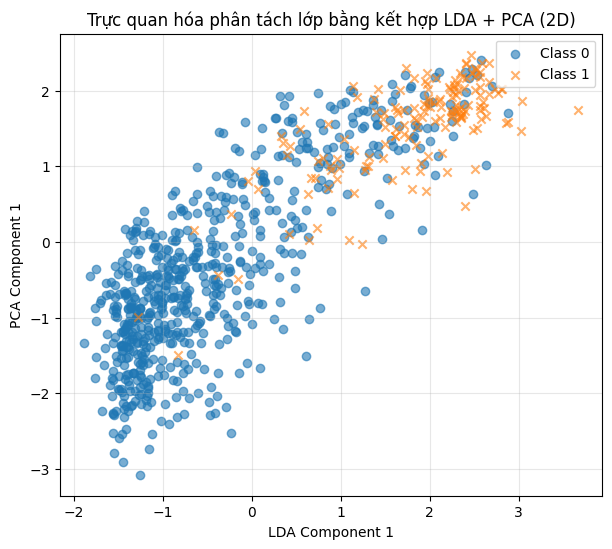

In [33]:
pca = PCA(n_components=1)
X_pca_1d = pca.fit_transform(X)

# Gộp thành 2 chiều
X_lda_2d = np.column_stack((X_lda, X_pca_1d))

# Vẽ scatter
plt.figure(figsize=(7,6))
plt.scatter(X_lda_2d[y==0,0], X_lda_2d[y==0,1], label="Class 0", alpha=0.6, marker='o')
plt.scatter(X_lda_2d[y==1,0], X_lda_2d[y==1,1], label="Class 1", alpha=0.6, marker='x')
plt.xlabel("LDA Component 1")
plt.ylabel("PCA Component 1")
plt.title("Trực quan hóa phân tách lớp bằng kết hợp LDA + PCA (2D)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Qua kết quả thực nghiệm, PCA cho phép giảm chiều dữ liệu và mô tả cấu trúc tổng quan của tập dữ liệu nhưng không thể hiện sự phân tách rõ rệt giữa hai lớp ASD và không ASD. Trong khi đó, LDA – nhờ sử dụng thông tin nhãn lớp – đã tạo ra một trục phân biệt (LD1) có khả năng tách rời hai nhóm một cách rõ ràng, với phương sai giải thích đạt 1.0. Do đó, đối với bài toán nhận diện ASD, LDA là phương pháp giảm chiều phù hợp và hiệu quả hơn PCA, đặc biệt trong các bài toán phân loại có giám sát.

# Phân loại

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [144]:
# Hàm để chia dữ liệu và tiền xử lý
def train_test_split_processed(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    preprocessor = build_preprocessor(X_train, y_train)
    
    return preprocessor.transform(X_train), preprocessor.transform(X_test), y_train, y_test

In [145]:
# Hàm để so sánh mô hình với với các train/ test với dữ liệu gốc và đã giảm chiều bằng LDA
def model_with_and_without_LDA(X, y, test_size, model):
    X_train, X_test, y_train, y_test = train_test_split_processed(X, y, test_size)
    
    print(X_train.shape, X_test.shape)
    
    # Áp dụng SMOTE để xử lý dữ liệu không cân bằng cho các class thiểu số trong tập huấn luyện
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    #Giảm chiều bằng lda
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train_lda = lda.fit_transform(X_train_resampled, y_train_resampled)
    X_test_lda = lda.transform(X_test)
    
    
    # train và predict với dữ liệu gốc và dữ liệu đã giảm chiều
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Đánh giá với cross-validation để có cái nhìn tổng quan hơn về hiệu suất của mô hình
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
    cv_mean = cv_scores.mean()
    
    model.fit(X_train_lda, y_train_resampled)
    y_pred_lda = model.predict(X_test_lda)

   

    print("---Chia theo tỉ lệ: %s---" % test_size)
    print("Độ chính xác chéo với dữ liệu gốc:", cv_mean)
    print("Độ chính xác với dữ liệu gốc:", accuracy_score(y_test, y_pred))
    print("Độ chính xác với dữ liệu đã giảm chiều:", accuracy_score(y_test, y_pred_lda))

In [136]:
# Hàm để vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.title("Ma trận nhầm lẫn")
    plt.show()

In [137]:
# Hàm để vẽ phân bố dữ liệu trong không gian 2D
def plot_2d_distribution(X_test, y_test, y_pred):
    pca = PCA(n_components=2)
    X_test_2d = pca.fit_transform(X_test)

    # Hiển thị nhãn thực tế
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_test, cmap='viridis', alpha=0.7)
    plt.title("Phân bố theo nhãn THỰC TẾ")
    plt.xlabel("Thành phần chính 1")
    plt.ylabel("Thành phần chính 2")

    # Hiển thị nhãn dự đoán
    plt.subplot(1,2,2)
    plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_pred, cmap='viridis', alpha=0.7)
    plt.title("Phân bố theo nhãn DỰ ĐOÁN")
    plt.xlabel("Thành phần chính 1")
    plt.ylabel("Thành phần chính 2")

    plt.tight_layout()
    plt.show()

### K-nearest neighbor

In [146]:
y = df['Class/ASD']
X = df.drop('Class/ASD', axis=1)
print(X.shape, y.shape)

(800, 20) (800,)


In [147]:
# Sử dụng KNN với k=20, p=2 chuẩn L2 norm, weights='distance' 
knn_model = KNeighborsClassifier(n_neighbors=20, p=2, weights='distance')

# Tỉ lệ 4:1
model_with_and_without_LDA(X, y, 0.2, knn_model)
print()
# Tỉ lệ 7:3
model_with_and_without_LDA(X, y, 0.3, knn_model)
print()
# Tỉ lệ 6:4
model_with_and_without_LDA(X, y, 0.4, knn_model)

(640, 19) (160, 19)
---Chia theo tỉ lệ: 0.2---
Độ chính xác chéo với dữ liệu gốc: 0.8737864077669902
Độ chính xác với dữ liệu gốc: 0.81875
Độ chính xác với dữ liệu đã giảm chiều: 0.81875

(560, 19) (240, 19)
---Chia theo tỉ lệ: 0.3---
Độ chính xác chéo với dữ liệu gốc: 0.8697407564810881
Độ chính xác với dữ liệu gốc: 0.8041666666666667
Độ chính xác với dữ liệu đã giảm chiều: 0.85

(480, 19) (320, 19)
---Chia theo tỉ lệ: 0.4---
Độ chính xác chéo với dữ liệu gốc: 0.872379254732196
Độ chính xác với dữ liệu gốc: 0.803125
Độ chính xác với dữ liệu đã giảm chiều: 0.84375


In [148]:
X_train, X_test, y_train, y_test = train_test_split_processed(X, y, 0.3)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Giảm chiều bằng lda
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_resampled, y_train_resampled)
X_test_lda = lda.transform(X_test)

In [149]:
knn = KNeighborsClassifier(n_neighbors=20, p=2, weights='distance')
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)


print("K-nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, y_pred))

print("---Giảm chiều LDA---")
knn.fit(X_train_lda, y_train_resampled)
y_pred_lda = knn.predict(X_test_lda)
print(classification_report(y_test, y_pred_lda))

K-nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       186
           1       0.54      0.91      0.68        54

    accuracy                           0.80       240
   macro avg       0.75      0.84      0.77       240
weighted avg       0.87      0.80      0.82       240

---Giảm chiều LDA---
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       186
           1       0.63      0.80      0.70        54

    accuracy                           0.85       240
   macro avg       0.78      0.83      0.80       240
weighted avg       0.87      0.85      0.86       240



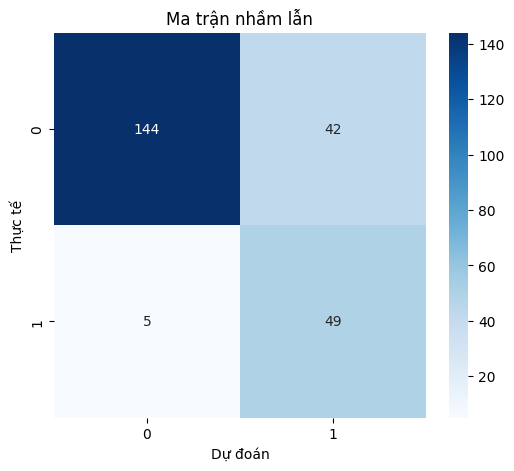

In [150]:
plot_confusion_matrix(y_test, y_pred)

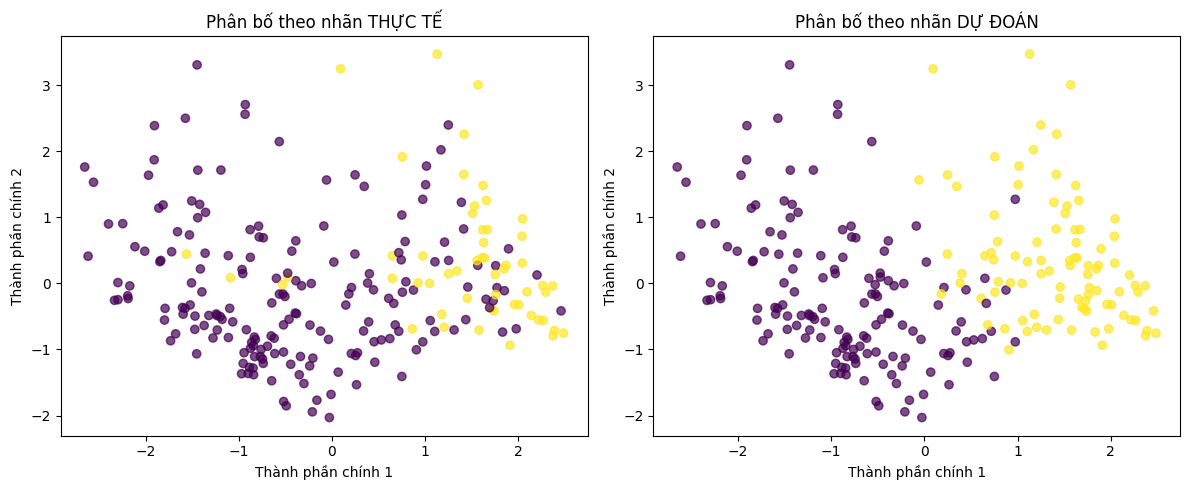

In [151]:
plot_2d_distribution(X_test, y_test, y_pred)

### Logistic Regression

In [152]:
lr_model = LogisticRegression(max_iter=1000)

# Tỉ lệ 4:1
model_with_and_without_LDA(X, y, 0.2, lr_model)
print()
# Tỉ lệ 7:3
model_with_and_without_LDA(X, y, 0.3, lr_model)
print()
# Tỉ lệ 6:4
model_with_and_without_LDA(X, y, 0.4, lr_model)

(640, 19) (160, 19)
---Chia theo tỉ lệ: 0.2---
Độ chính xác chéo với dữ liệu gốc: 0.8766990291262136
Độ chính xác với dữ liệu gốc: 0.8375
Độ chính xác với dữ liệu đã giảm chiều: 0.8375

(560, 19) (240, 19)
---Chia theo tỉ lệ: 0.3---
Độ chính xác chéo với dữ liệu gốc: 0.8808026227915731
Độ chính xác với dữ liệu gốc: 0.85
Độ chính xác với dữ liệu đã giảm chiều: 0.85

(480, 19) (320, 19)
---Chia theo tỉ lệ: 0.4---
Độ chính xác chéo với dữ liệu gốc: 0.8828028180969358
Độ chính xác với dữ liệu gốc: 0.834375
Độ chính xác với dữ liệu đã giảm chiều: 0.834375


In [153]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

lr.fit(X_train_lda, y_train_resampled)
y_pred_lda = lr.predict(X_test_lda)

print("---Giảm chiều LDA---")
print(classification_report(y_test, y_pred_lda))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       186
           1       0.62      0.83      0.71        54

    accuracy                           0.85       240
   macro avg       0.79      0.84      0.81       240
weighted avg       0.87      0.85      0.86       240

---Giảm chiều LDA---
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       186
           1       0.63      0.80      0.70        54

    accuracy                           0.85       240
   macro avg       0.78      0.83      0.80       240
weighted avg       0.87      0.85      0.86       240



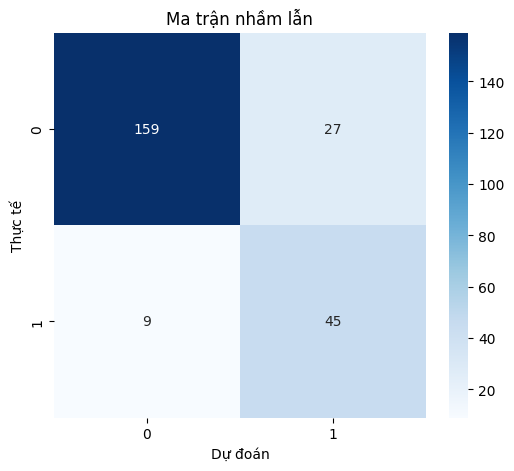

In [154]:
plot_confusion_matrix(y_test, y_pred)

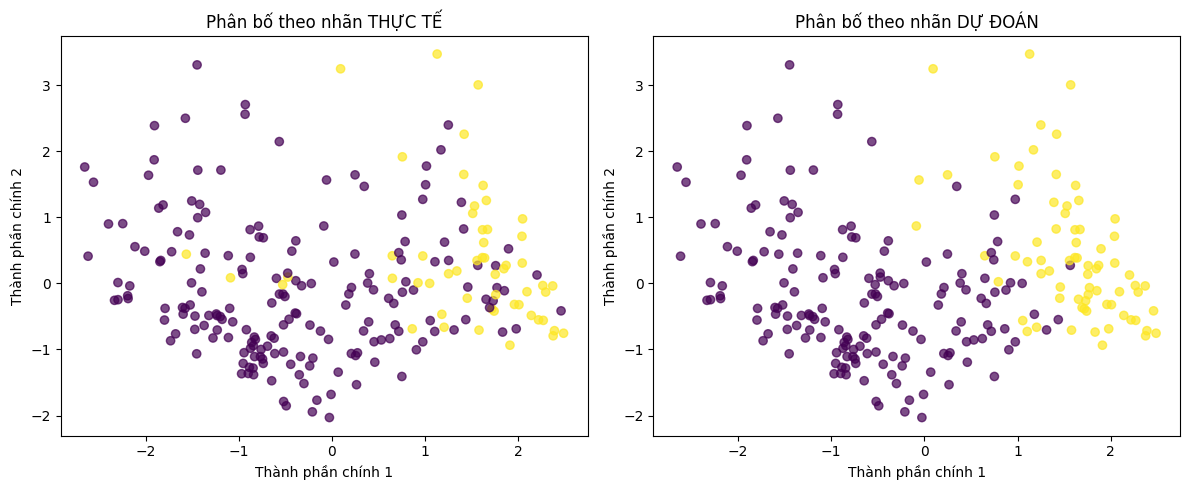

In [155]:
plot_2d_distribution(X_test, y_test, y_pred)

### Support Vector Machine

In [174]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly')
# Tỉ lệ 4:1
model_with_and_without_LDA(X, y, 0.2, svm_model)
print()
# Tỉ lệ 7:3
model_with_and_without_LDA(X, y, 0.3, svm_model)
print()
# Tỉ lệ 6:4
model_with_and_without_LDA(X, y, 0.4, svm_model)

(640, 19) (160, 19)
---Chia theo tỉ lệ: 0.2---
Độ chính xác chéo với dữ liệu gốc: 0.920388349514563
Độ chính xác với dữ liệu gốc: 0.8625
Độ chính xác với dữ liệu đã giảm chiều: 0.85625

(560, 19) (240, 19)
---Chia theo tỉ lệ: 0.3---
Độ chính xác chéo với dữ liệu gốc: 0.9150142675004552
Độ chính xác với dữ liệu gốc: 0.8708333333333333
Độ chính xác với dữ liệu đã giảm chiều: 0.8083333333333333

(480, 19) (320, 19)
---Chia theo tỉ lệ: 0.4---
Độ chính xác chéo với dữ liệu gốc: 0.9114676173499703
Độ chính xác với dữ liệu gốc: 0.86875
Độ chính xác với dữ liệu đã giảm chiều: 0.796875


In [176]:
svm = SVC(kernel='poly', C=1.0, gamma='scale')
svm.fit(X_train_resampled, y_train_resampled)
y_pred = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

svm.fit(X_train_lda, y_train_resampled)
y_pred_lda = svm.predict(X_test_lda)

print("---Giảm chiều LDA---")
print(classification_report(y_test, y_pred_lda))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       186
           1       0.70      0.74      0.72        54

    accuracy                           0.87       240
   macro avg       0.81      0.82      0.82       240
weighted avg       0.87      0.87      0.87       240

---Giảm chiều LDA---
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       186
           1       0.55      0.87      0.67        54

    accuracy                           0.81       240
   macro avg       0.75      0.83      0.77       240
weighted avg       0.86      0.81      0.82       240



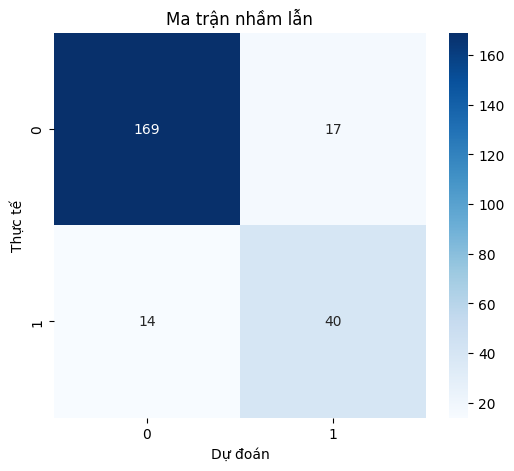

In [177]:
plot_confusion_matrix(y_test, y_pred)

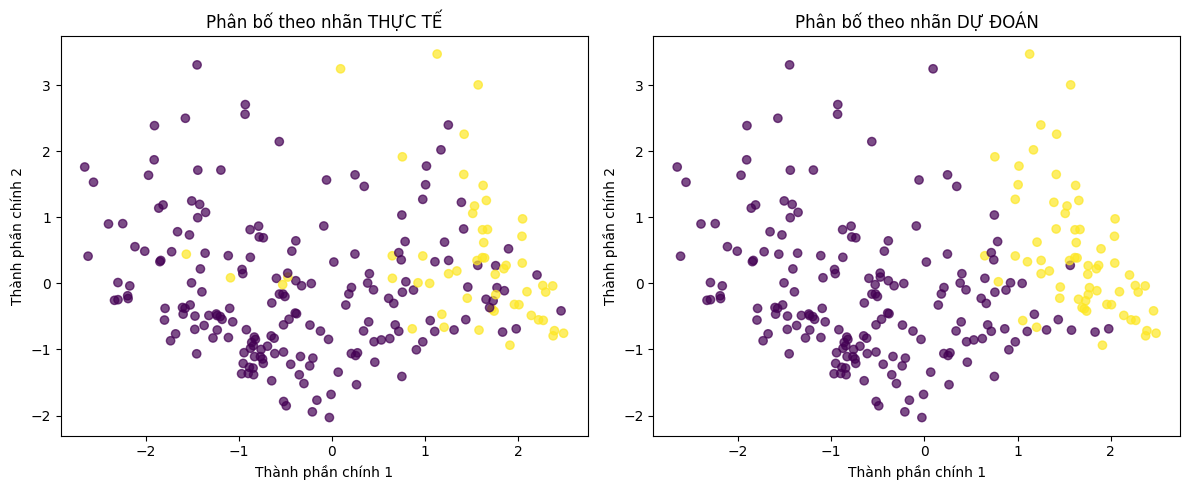

In [159]:
plot_2d_distribution(X_test, y_test, y_pred)

# Phân lớp

K_Means

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [180]:
y = df_processed['Class/ASD']
X = df_processed.drop(['Class/ASD'], axis=1)
print(X.shape, y.shape)

(800, 19) (800,)


Chọn số cụm k

Vì dữ liệu của bạn có 2 lớp (0 & 1), ta thử bắt đầu với k = 2.

Để kiểm tra xem k=2 có hợp lý không → dùng Elbow Method:

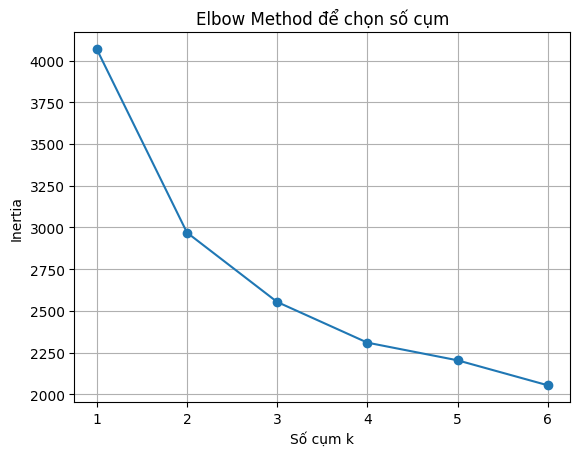

In [181]:
inertias = []
K = range(1, 7)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.title("Elbow Method để chọn số cụm")
plt.grid(True)
plt.show()

“khuỷu tay” xuất hiện tại k = 2 → dùng k=2 là hợp lý.

In [193]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

đánh giá xem phân cụm có tốt hay không → dùng Silhouette Score:

In [194]:
sil_score = silhouette_score(X, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.25330552996747924


So sánh phân cụm với nhãn thật (đầu ra)

In [195]:
comparison = pd.crosstab(y, clusters, rownames=['Class/ASD'], colnames=['Cluster'])
print(comparison)

Cluster      0    1
Class/ASD          
0          183  456
1          152    9


Trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có
tương quan hay hình thành cụm dữ liệu.

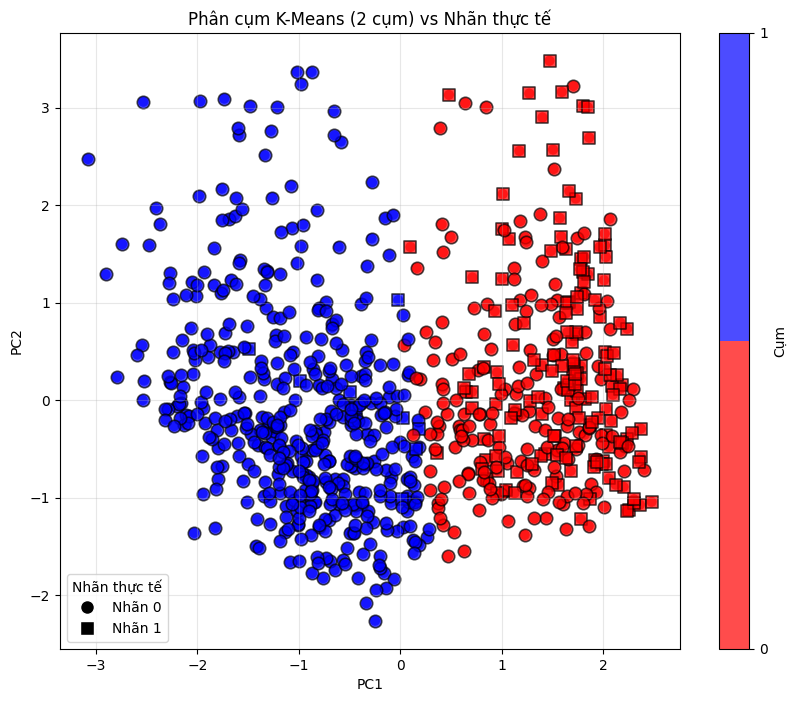

In [196]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

plt.figure(figsize=(10, 8))


from matplotlib.colors import ListedColormap
colors = ['red', 'blue']  
cmap_binary = ListedColormap(colors)


scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], 
                     c=clusters, cmap=cmap_binary,
                     alpha=0.7, s=60, 
                     edgecolors='white', linewidth=0.5)

for i in range(len(X_vis)):
    current_color = colors[clusters[i]] 
    plt.scatter(X_vis[i, 0], X_vis[i, 1], 
                marker='o' if y[i] == 0 else 's',
                color=current_color,
                edgecolors='black',
                s=80, alpha=0.7, linewidth=1.2) 

plt.colorbar(scatter, label='Cụm', ticks=[0, 1])
plt.title("Phân cụm K-Means (2 cụm) vs Nhãn thực tế")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.3)

# Tạo legend cho nhãn thực tế
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor='black', markersize=10, label='Nhãn 0'),
                  plt.Line2D([0], [0], marker='s', color='w', 
                  markerfacecolor='black', markersize=10, label='Nhãn 1')]
plt.legend(handles=legend_elements, title='Nhãn thực tế')

plt.show()

# Chuyển từ phân loại sang hồi quy

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import SMOTE

In [161]:
y = df['Class/ASD']
X = df.drop('Class/ASD', axis=1)
print(X.shape, y.shape)

(800, 20) (800,)


In [162]:
def plot_residuals(y_true, y_pred, title):

    residuals = y_true - y_pred

    plt.figure(figsize=(6,4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel("Sai số (Residual)")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()

In [163]:
def plot_regression_scatter(y_true, y_pred, title):

    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6)

    # Đường y = x (dự đoán hoàn hảo)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

    plt.xlabel("Giá trị thật (y_reg)")
    plt.ylabel("Giá trị dự đoán")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()


In [164]:
def regression_with_and_without_PCA(X, y, test_size, model):

    print(f"CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = {test_size}")

    # 1. Chia dữ liệu + tiền xử lý
    X_train, X_test, y_train, y_test = train_test_split_processed(
        X, y, test_size
    )

    print(f"→ Kích thước tập train ban đầu: {X_train.shape}")

    # 2. Xử lý mất cân bằng bằng SMOTE
    smote = SMOTE(random_state=42)
    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)

    print(f"→ Sau SMOTE, số mẫu train: {X_train_rs.shape[0]}")

    # 3. Logistic Regression tạo đầu ra hồi quy
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_rs, y_train_rs)

    y_reg_train = clf.predict_proba(X_train_rs)[:, 1]
    y_reg_test  = clf.predict_proba(X_test)[:, 1]

    print("  - Ví dụ giá trị đầu ra hồi quy:", y_reg_train[:10])

    # HỒI QUY VỚI DỮ LIỆU GỐC

    model.fit(X_train_rs, y_reg_train)
    y_pred = model.predict(X_test)

    mse_raw = mean_squared_error(y_reg_test, y_pred)
    r2_raw  = r2_score(y_reg_test, y_pred)

    # GIẢM CHIỀU PCA (1/3)

    n_components = X_train_rs.shape[1] // 3
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train_rs)
    X_test_pca  = pca.transform(X_test)

    model.fit(X_train_pca, y_reg_train)
    y_pred_pca = model.predict(X_test_pca)

    mse_pca = mean_squared_error(y_reg_test, y_pred_pca)
    r2_pca  = r2_score(y_reg_test, y_pred_pca)

    print("----- KẾT QUẢ -----")
    print("Huấn luyện mô hình hồi quy với dữ liệu GỐC")
    print("MSE:", mse_raw)
    print("R2 :", r2_raw)

    print("Giảm chiều dữ liệu bằng PCA (1/3 số chiều)")
    print("MSE:", mse_pca)
    print("R2 :", r2_pca)

    plot_regression_scatter(
        y_reg_test,
        y_pred,
        "Regression (Dữ liệu GỐC): Giá trị thật vs Dự đoán"
    )
    plot_regression_scatter(
        y_reg_test,
        y_pred_pca,
        "Regression - PCA (1/3)"
    )

### KNN

CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.2
→ Kích thước tập train ban đầu: (640, 19)
→ Sau SMOTE, số mẫu train: 1030
  - Ví dụ giá trị đầu ra hồi quy: [0.96178973 0.01708779 0.00588319 0.00540589 0.2659512  0.02734613
 0.58880945 0.91690446 0.9444456  0.76213229]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.02123760752124801
R2 : 0.8328082812107327
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.01704048226077497
R2 : 0.865849883734476


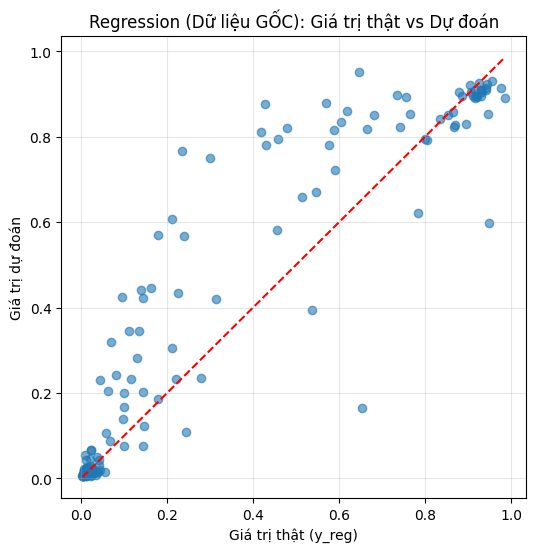

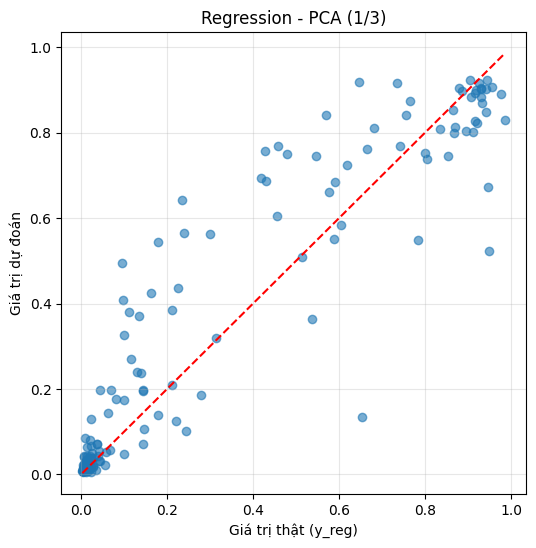


CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.3
→ Kích thước tập train ban đầu: (560, 19)
→ Sau SMOTE, số mẫu train: 906
  - Ví dụ giá trị đầu ra hồi quy: [0.94418685 0.04044237 0.009801   0.44575914 0.89110001 0.09417166
 0.0595748  0.95507319 0.12214063 0.00352961]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.02086910962754053
R2 : 0.8466566722888451
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.014670592562283542
R2 : 0.8922025173500322


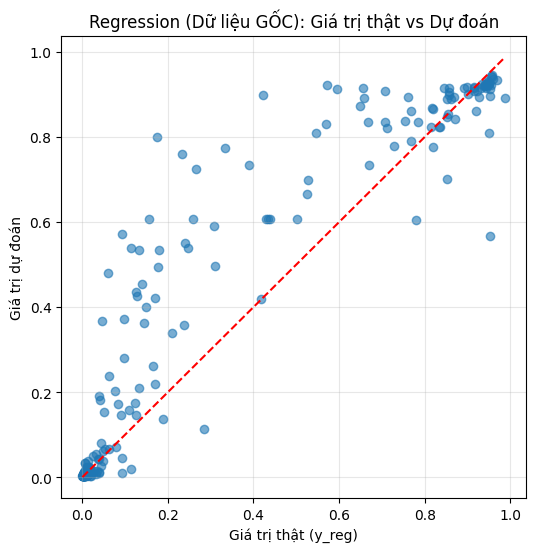

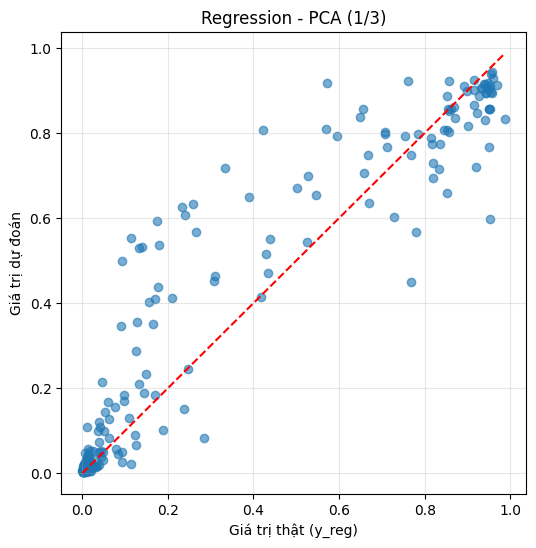


CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.4
→ Kích thước tập train ban đầu: (480, 19)
→ Sau SMOTE, số mẫu train: 768
  - Ví dụ giá trị đầu ra hồi quy: [0.76555362 0.28650575 0.03791033 0.00554838 0.02089454 0.00793844
 0.00195582 0.00566424 0.00237751 0.52822659]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.019757739750639554
R2 : 0.8490457679096854
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.01331421729847877
R2 : 0.8982759428182878


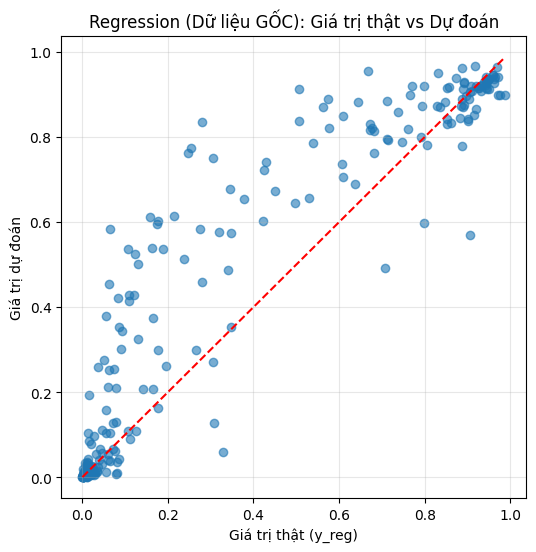

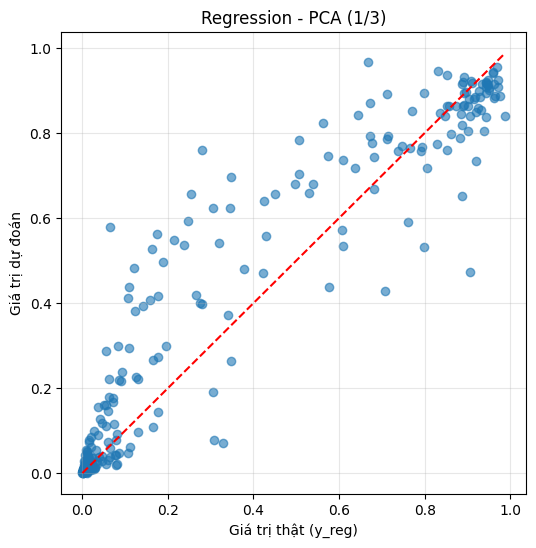

In [165]:
knn_reg = KNeighborsRegressor(
    n_neighbors=20,
    weights="distance",
    p=2
)

# Tỉ lệ 4:1
regression_with_and_without_PCA(X, y, 0.2, knn_reg)
print()

# Tỉ lệ 7:3
regression_with_and_without_PCA(X, y, 0.3, knn_reg)
print()

# Tỉ lệ 6:4
regression_with_and_without_PCA(X, y, 0.4, knn_reg)
print()

### LINEAR REGRESSION

CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.2
→ Kích thước tập train ban đầu: (640, 19)
→ Sau SMOTE, số mẫu train: 1030
  - Ví dụ giá trị đầu ra hồi quy: [0.96178973 0.01708779 0.00588319 0.00540589 0.2659512  0.02734613
 0.58880945 0.91690446 0.9444456  0.76213229]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.008803848479850596
R2 : 0.9306922609887274
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.024449408318552763
R2 : 0.8075235830556853


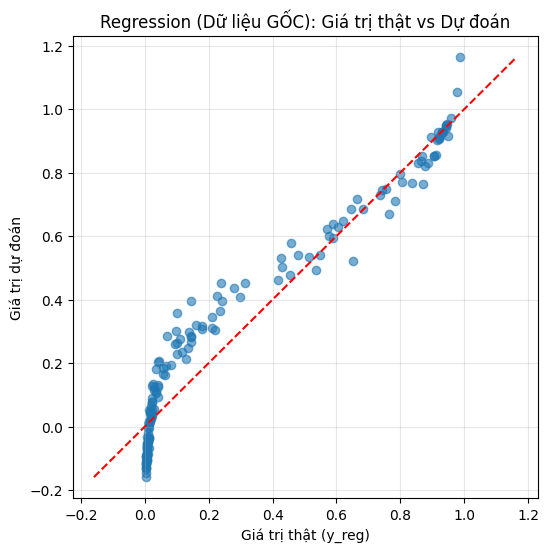

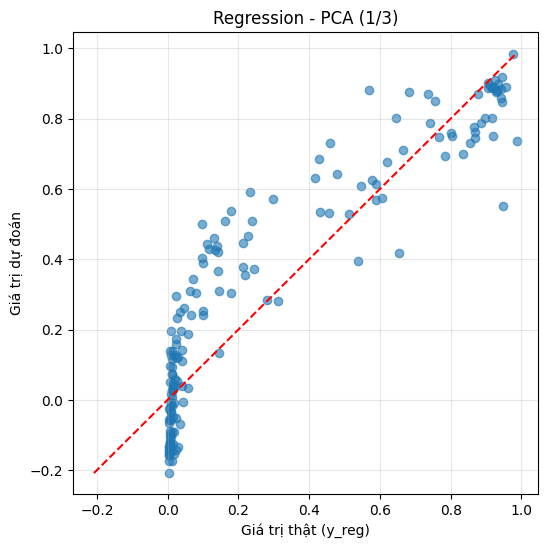


CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.3
→ Kích thước tập train ban đầu: (560, 19)
→ Sau SMOTE, số mẫu train: 906
  - Ví dụ giá trị đầu ra hồi quy: [0.94418685 0.04044237 0.009801   0.44575914 0.89110001 0.09417166
 0.0595748  0.95507319 0.12214063 0.00352961]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.012457495712236418
R2 : 0.9084640465474949
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.023857550580462312
R2 : 0.8246980219885675


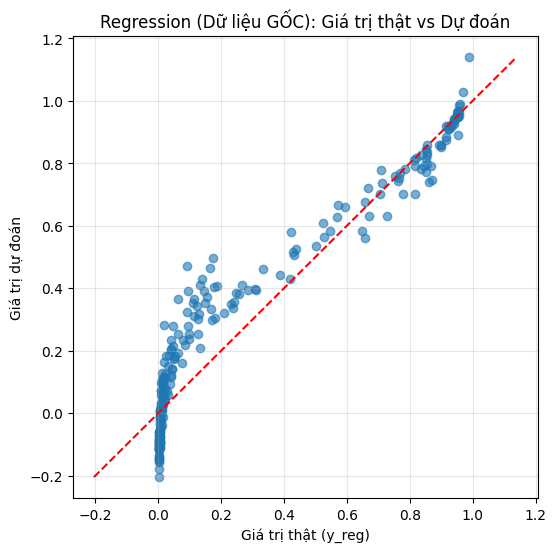

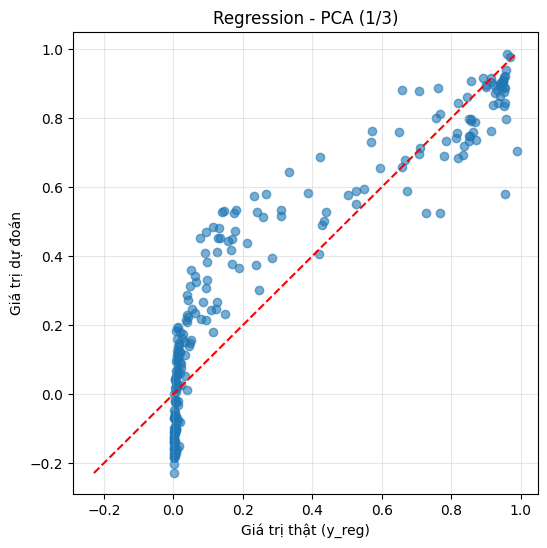


CHIA DỮ LIỆU THEO TỈ LỆ TEST SIZE = 0.4
→ Kích thước tập train ban đầu: (480, 19)
→ Sau SMOTE, số mẫu train: 768
  - Ví dụ giá trị đầu ra hồi quy: [0.76555362 0.28650575 0.03791033 0.00554838 0.02089454 0.00793844
 0.00195582 0.00566424 0.00237751 0.52822659]
----- KẾT QUẢ -----
Huấn luyện mô hình hồi quy với dữ liệu GỐC
MSE: 0.012943006978646098
R2 : 0.9011120854885306
Giảm chiều dữ liệu bằng PCA (1/3 số chiều)
MSE: 0.02471682835173962
R2 : 0.8111570508248953


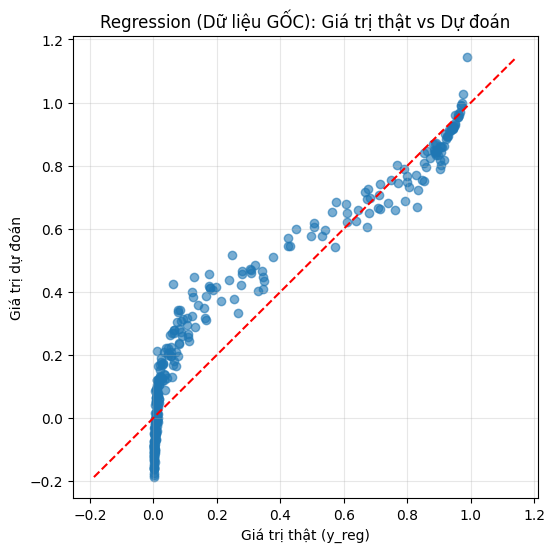

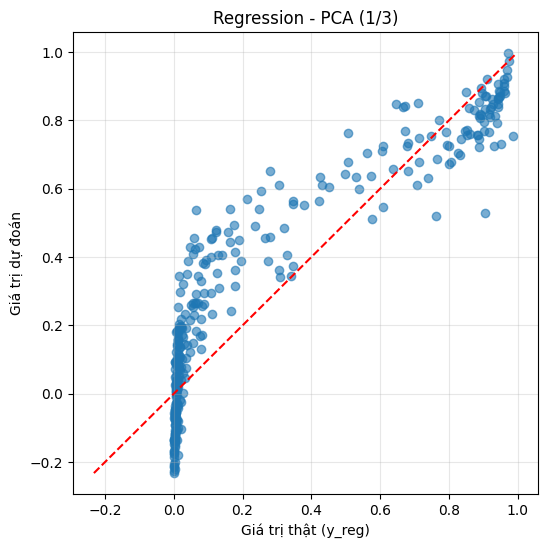

In [166]:
linear_reg = LinearRegression()

regression_with_and_without_PCA(X, y, 0.2, linear_reg)
print()

regression_with_and_without_PCA(X, y, 0.3, linear_reg)
print()

regression_with_and_without_PCA(X, y, 0.4, linear_reg)
print()